# Ex04 Histogram

In [1]:
import pandas as pd
import sqlite3

In [2]:
con = sqlite3.connect("../data/checking-logs.sqlite")
cur = con.cursor()

In [3]:
commit_data =  pd.read_sql("""
                SELECT timestamp as commit_time FROM checker
                WHERE uid LIKE 'user%'
            """, 
            con, parse_dates='commit_time')
commit_data

,commit_time
0,2020-04-17 05:19:02.744528
1,2020-04-17 05:22:35.249331
2,2020-04-17 05:22:45.549397
3,2020-04-17 05:34:14.691200
4,2020-04-17 05:34:24.422370
...,...
3202,2020-05-21 20:19:06.872761
3203,2020-05-21 20:22:41.785725
3204,2020-05-21 20:22:41.877806
3205,2020-05-21 20:37:00.129678


In [4]:
commit_data['commit_date'] = commit_data.commit_time.dt.date
commit_data['commit_hour'] = commit_data.commit_time.dt.hour
commit_data['commit_weekday'] = commit_data.commit_time.dt.weekday
commit_data.commit_date = pd.to_datetime(commit_data.commit_date)
commit_data

,commit_time,commit_date,commit_hour,commit_weekday
0,2020-04-17 05:19:02.744528,2020-04-17,5,4
1,2020-04-17 05:22:35.249331,2020-04-17,5,4
2,2020-04-17 05:22:45.549397,2020-04-17,5,4
3,2020-04-17 05:34:14.691200,2020-04-17,5,4
4,2020-04-17 05:34:24.422370,2020-04-17,5,4
...,...,...,...,...
3202,2020-05-21 20:19:06.872761,2020-05-21,20,3
3203,2020-05-21 20:22:41.785725,2020-05-21,20,3
3204,2020-05-21 20:22:41.877806,2020-05-21,20,3
3205,2020-05-21 20:37:00.129678,2020-05-21,20,3


In [5]:
commit_weekend = commit_data[commit_data.commit_weekday.isin([5,6])]
commit_weekday = commit_weekend[['commit_date','commit_hour']]
commit_weekend

,commit_time,commit_date,commit_hour,commit_weekday
23,2020-04-18 07:56:45.408648,2020-04-18,7,5
24,2020-04-18 13:36:53.971502,2020-04-18,13,5
25,2020-04-18 13:42:35.482008,2020-04-18,13,5
26,2020-04-18 13:51:22.291271,2020-04-18,13,5
27,2020-04-18 13:53:17.230725,2020-04-18,13,5
...,...,...,...,...
3088,2020-05-17 22:23:05.744415,2020-05-17,22,6
3089,2020-05-17 22:23:11.078664,2020-05-17,22,6
3090,2020-05-17 22:23:11.220412,2020-05-17,22,6
3091,2020-05-17 22:25:15.051189,2020-05-17,22,6


In [6]:
commit_working = commit_data[commit_data.commit_weekday.isin([0,1,2,3,4])]
commit_working = commit_working[['commit_hour','commit_date']]
commit_working

,commit_hour,commit_date
0,5,2020-04-17
1,5,2020-04-17
2,5,2020-04-17
3,5,2020-04-17
4,5,2020-04-17
...,...,...
3202,20,2020-05-21
3203,20,2020-05-21
3204,20,2020-05-21
3205,20,2020-05-21


In [7]:
df_work = pd.Series(commit_working['commit_hour'], name = 'working_day')
df_weekend = pd.Series(commit_weekend['commit_hour'], name = 'weekend')

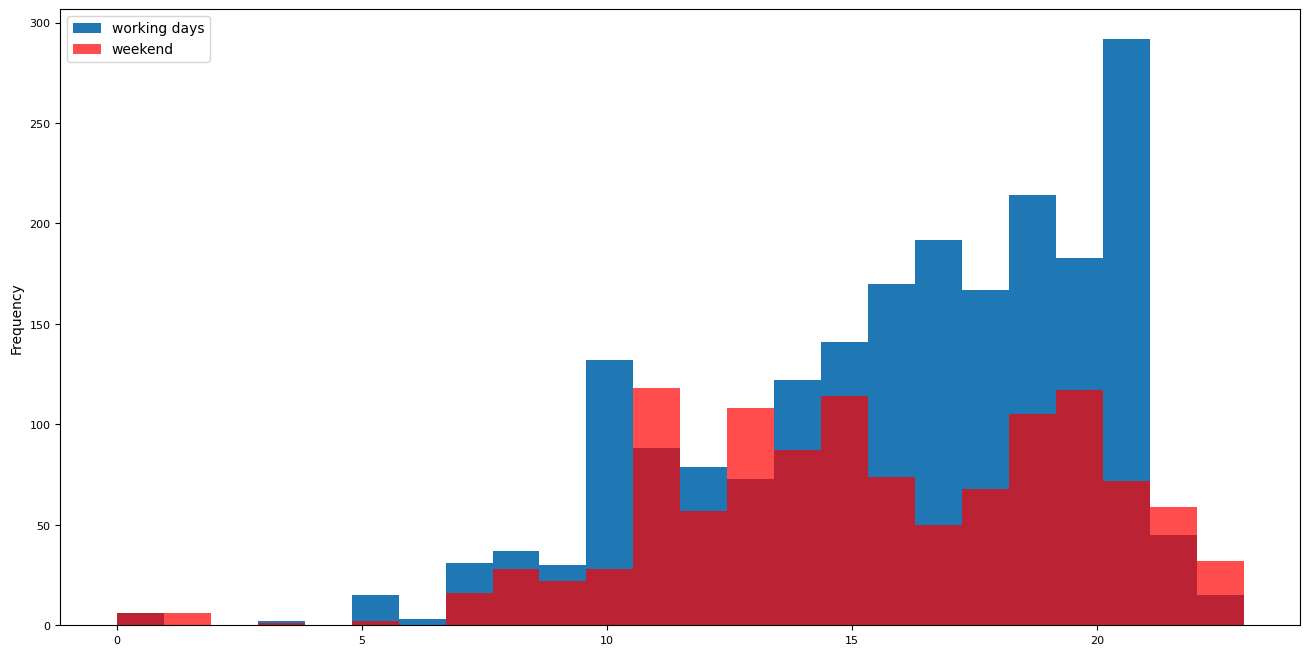

In [8]:
ax = df_work.plot(kind='hist',bins=24, figsize=(16,8),fontsize=8)
df_weekend.plot(kind='hist',bins=24, ax = ax, alpha = 0.7, color = 'red')
ax.legend(['working days','weekend'], loc = 'upper left')

* Бывают ли часы, когда общее количество коммитов в выходные дни было выше, чем в рабочие дни?

Ответ: в 11,13,22,23 часа

In [9]:
con.close()